In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout


In [11]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='D:/github/AI-projects/dogsvscats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='D:/github/AI-projects/dogsvscats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1865 files belonging to 2 classes.
Found 1446 files belonging to 2 classes.


In [12]:

#normalizing the data

def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [13]:
import cv2


img = cv2.imread('dog.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



CNN model

In [14]:

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
59/59 [==============================] - ETA: 0s - loss: 3.2104 - accuracy: 0.5614

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_5855]

In [ ]:

import cv2


In [ ]:
test_img=cv2.imread('D:\github\AI-projects\dogsvscats\cat.jpg')


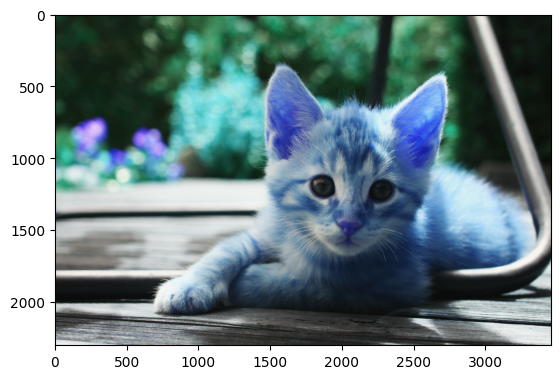

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2304, 3456, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 245ms/step


array([[1.]], dtype=float32)

In [ ]:
output=model.predict(test_input)
print(output)

1/1 [==============================] - 0s 73ms/step
[[1.]]


In [ ]:
import numpy as np

output={0:"cat", 1:"dog"}
predicted_index=np.argmax(output)

predicted_class=output[predicted_index]
print(predicted_index)

print(predicted_class)


0
cat
